In [2]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 18.5 MB/s eta 0:00:00


In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from statsmodels.tsa.arima.model import ARIMA

from pmdarima.arima import auto_arima

In [4]:
df = pd.read_excel('energy.xlsx', index_col='DATE', parse_dates=True)

In [5]:
df

,energy
DATE,
1985-01-01,71.5920
1985-02-01,69.7870
1985-03-01,61.6790
1985-04-01,56.7479
1985-05-01,54.6165
...,...
2018-08-01,113.0449
2018-09-01,101.4058
2018-10-01,94.4922


In [6]:
df.shape

(408, 1)

In [7]:
df.describe()

,energy
count,408.000000
mean,88.062232
std,15.168540
min,54.616500
25%,76.499750
50%,88.940450
75%,99.733200
max,126.362600


In [8]:
df.index.min(), df.index.max()

(Timestamp('1985-01-01 00:00:00'), Timestamp('2018-12-01 00:00:00'))

In [9]:
df.columns = ['producao']

<Axes: xlabel='DATE'>

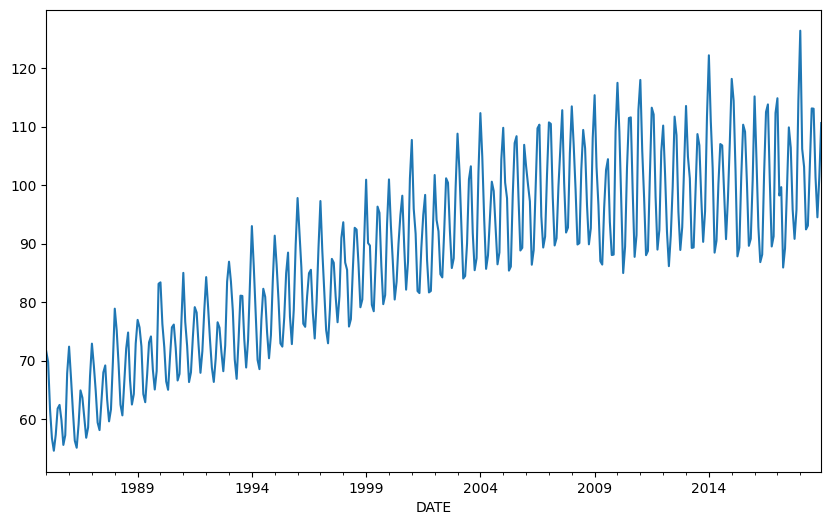

In [10]:
df['producao'].plot(figsize=(10,6))

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose

<Figure size 1000x800 with 0 Axes>

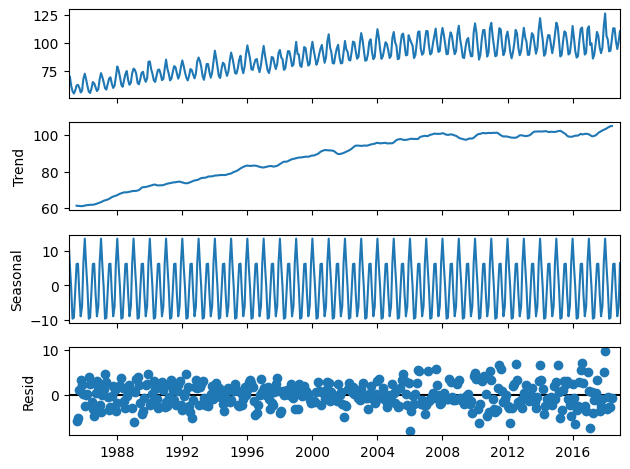

In [12]:
resultado = seasonal_decompose(df)

fig = plt.figure(figsize=(10, 8))
fig = resultado.plot()

In [13]:
from statsmodels.tsa.stattools import adfuller

In [14]:
# p-value menor que 0.5 série não é estacionária, ou seja existe sazonalidade
result = adfuller(df['producao'].dropna())
print(f'Teste ADF:  {result[0]}')
print(f'p-value:  {result[1]}')

Teste ADF:  -2.252399047046594
p-value:  0.18777984601967806


In [15]:
# p-value que 5%, rejeitando a hipotese nula
result = adfuller(df['producao'].diff().dropna())
print(f'Teste ADF:  {result[0]}')
print(f'p-value:  {result[1]}')

Teste ADF:  -7.450892277526341
p-value:  5.67456995585561e-11


In [16]:
# AIC, quanto menor o AIC menor o erro.
fit_arima = auto_arima(df, d=1, start_p=1, max_p=3, max_q=3, seasonal=True, m=6,
                       D=1, start_P=1, start_Q=1, max_P=2, max_Q=2,
                       information_criterion='aic', trace=True, error='ignore',
                       stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,2)(1,1,1)[6]             : AIC=1970.075, Time=9.30 sec
 ARIMA(0,1,0)(0,1,0)[6]             : AIC=2494.965, Time=0.33 sec
 ARIMA(1,1,0)(1,1,0)[6]             : AIC=2053.701, Time=1.65 sec
 ARIMA(0,1,1)(0,1,1)[6]             : AIC=2128.799, Time=2.89 sec
 ARIMA(1,1,2)(0,1,1)[6]             : AIC=2064.375, Time=2.73 sec
 ARIMA(1,1,2)(1,1,0)[6]             : AIC=inf, Time=3.10 sec
 ARIMA(1,1,2)(2,1,1)[6]             : AIC=1929.636, Time=2.61 sec
 ARIMA(1,1,2)(2,1,0)[6]             : AIC=inf, Time=2.97 sec
 ARIMA(1,1,2)(2,1,2)[6]             : AIC=1869.816, Time=5.39 sec
 ARIMA(1,1,2)(1,1,2)[6]             : AIC=1867.969, Time=2.37 sec
 ARIMA(1,1,2)(0,1,2)[6]             : AIC=2014.992, Time=1.10 sec
 ARIMA(0,1,2)(1,1,2)[6]             : AIC=1874.900, Time=1.80 sec
 ARIMA(1,1,1)(1,1,2)[6]             : AIC=1866.400, Time=1.74 sec
 ARIMA(1,1,1)(0,1,2)[6]             : AIC=2014.153, Time=0.81 sec
 ARIMA(1,1,1)(1,1,1)[6]             : AIC=1

In [17]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [18]:
model = SARIMAX(df, order=(1, 1, 1), seasonal_order=(1, 1, 2, 6))
resultado_sarimax = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [19]:
resultado_sarimax.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                       SARIMAX Results                                        
==============================================================================================
Dep. Variable:                               producao   No. Observations:                  408
Model:             SARIMAX(1, 1, 1)x(1, 1, [1, 2], 6)   Log Likelihood                -927.200
Date:                                Thu, 15 Aug 2024   AIC                           1866.400
Time:                                        21:16:31   BIC                           1890.364
Sample:                                    01-01-1985   HQIC                          1875.889
                                         - 12-01-2018                                         
Covariance Type:                                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5125      0.042     12.156      0.000       0.430       0.595
ma.L1         -0.9601      0.017    -56.250      0.000      -0.994      -0.927
ar.S.L6       -0.9973      0.003   -350.055      0.000      -1.003      -0.992
ma.S.L6        0.1026      0.037      2.775      0.006       0.030       0.175
ma.S.L12      -0.7748      0.035    -22.180      0.000      -0.843      -0.706
sigma2         5.6413      0.322     17.544      0.000       5.011       6.272
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                29.17
Prob(Q):                              0.84   Prob(JB):                         0.00
Heteroskedasticity (H):               2.99   Skew:                            -0.18
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.27
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [20]:
predicoes = resultado_sarimax.get_prediction(start=-12)

predicao_media = predicoes.predicted_mean

In [21]:
intervalo_confianca = predicoes.conf_int()
limite_abaixo = intervalo_confianca.iloc[: ,0]
limite_acima = intervalo_confianca.iloc[: ,1]

# Erro entre
limite_abaixo[0], limite_acima[0]

<ipython-input-21-bddc7909163e>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  limite_abaixo[0], limite_acima[0]


(115.1447404570401, 124.45517675290846)

In [22]:
predicao_media[0]

<ipython-input-22-74289e959cc9>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  predicao_media[0]


119.79995860497428

In [23]:
datas_previsao = np.array(predicao_media.index)

datas = np.asarray(df.index)

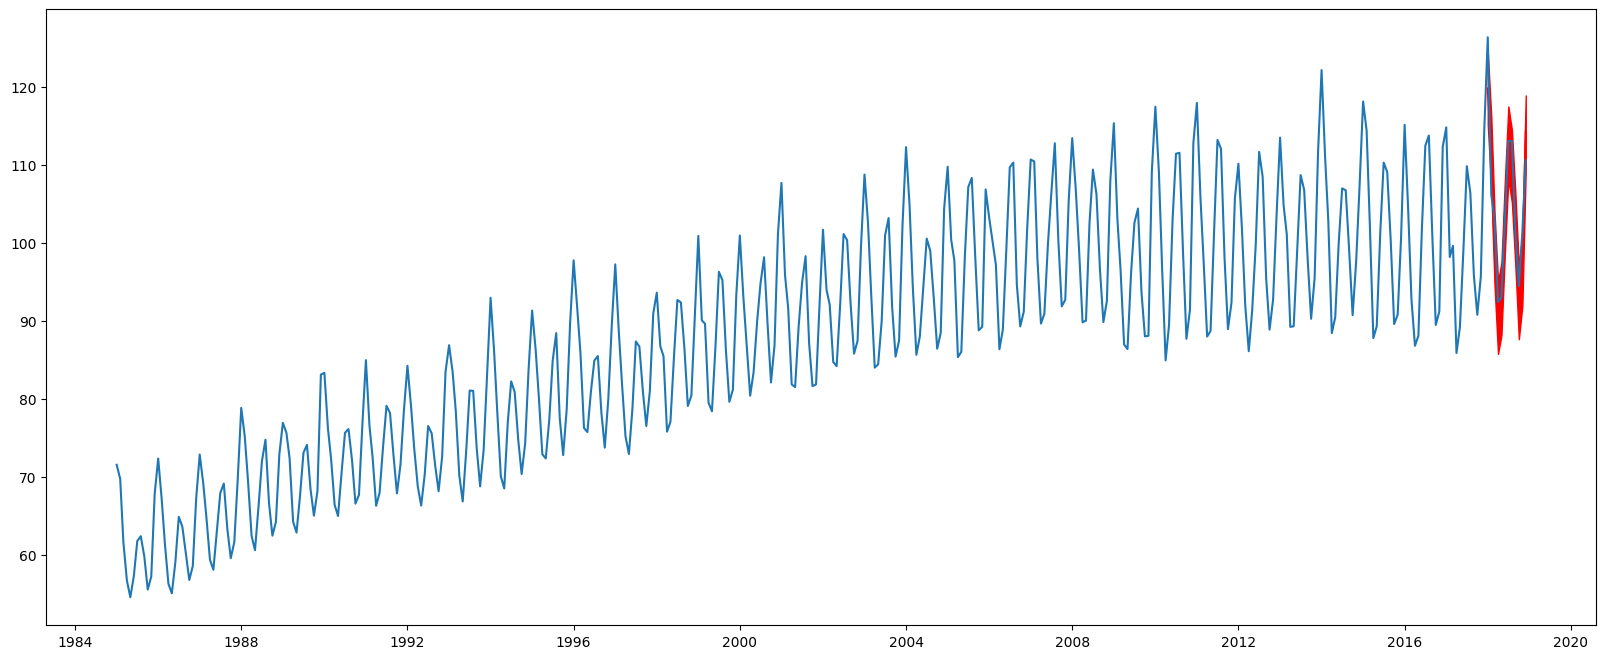

In [24]:
# Plotando Gráfico

plt.figure(figsize=(20, 8))
plt.plot(datas_previsao, predicao_media.values, color='red', label='previsao')
plt.fill_between(datas_previsao, limite_abaixo, limite_acima, color='red')
plt.plot(datas, df.values, label='real')
plt.show()

In [25]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(df[-12:].values, predicao_media.values)
print(f'MAE: {mae}')

MAE: 2.7071201498891306


In [26]:
forecast = resultado_sarimax.get_forecast(steps=12)

forecast_medio = forecast.predicted_mean
forecast_medio.size

12

In [27]:
intervalo_confianca_forecast = forecast.conf_int()
intervalo_abaixo_f = intervalo_confianca_forecast.iloc[:,0]
intervalo_acima_f = intervalo_confianca_forecast.iloc[:,1]

intervalo_abaixo_f[10], intervalo_acima_f[10]

<ipython-input-27-ad5a34898592>:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intervalo_abaixo_f[10], intervalo_acima_f[10]


(91.38813005236821, 103.10930985132882)

In [28]:
forecast_medio[10]

<ipython-input-28-b920ebcf499f>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  forecast_medio[10]


97.24871995184851

In [29]:
data_forecast = np.asarray(forecast_medio.index)
pred_dates = np.asarray(predicao_media.index)

In [30]:
dates = np.asarray(df.index)

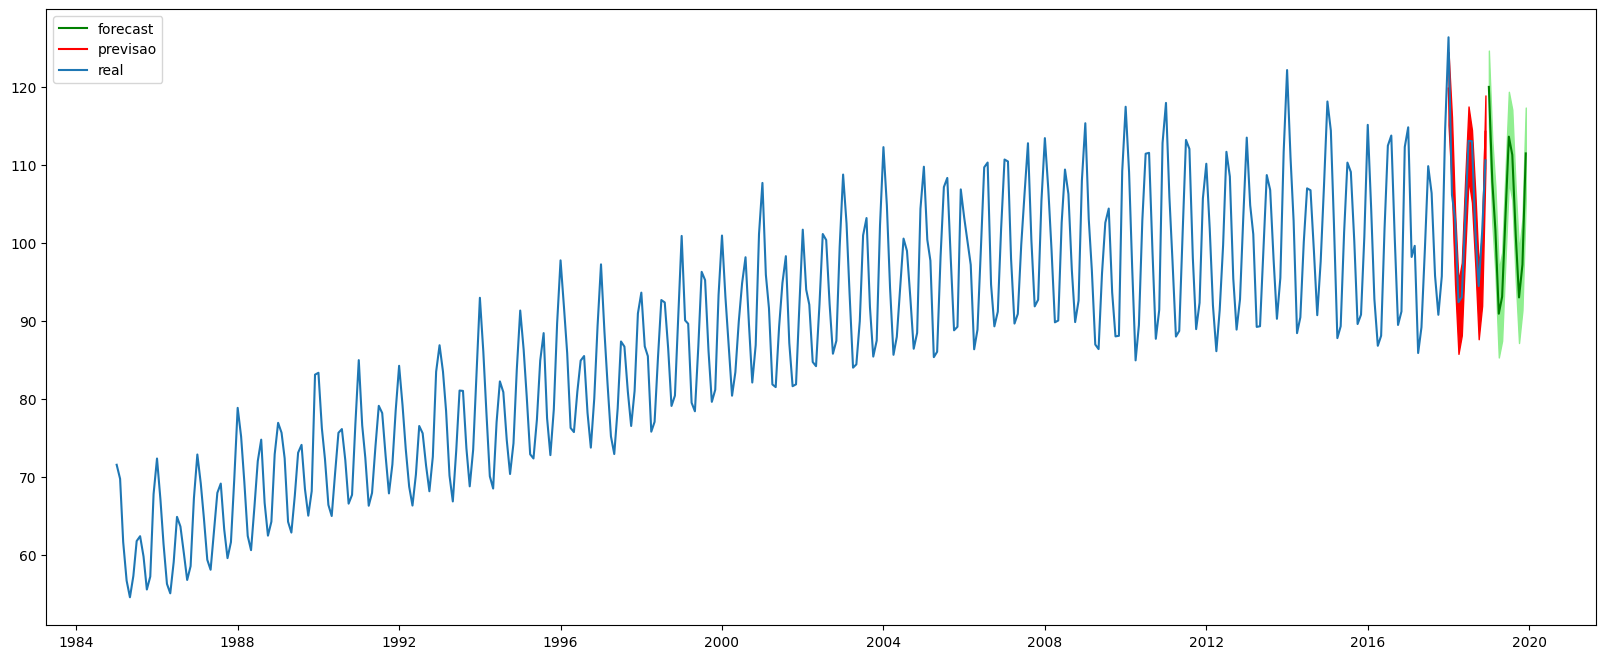

In [31]:
# Plotando Gráfico

plt.figure(figsize=(20, 8))
plt.plot(data_forecast, forecast_medio.values, color='green', label='forecast')
plt.fill_between(data_forecast, intervalo_abaixo_f, intervalo_acima_f, color='lightgreen')

plt.plot(datas_previsao, predicao_media.values, color='red', label='previsao')
plt.fill_between(datas_previsao, limite_abaixo, limite_acima, color='red')

plt.plot(datas, df.values, label='real')
plt.legend(loc='upper left')
plt.show()

In [32]:
from xgboost import XGBRegressor

In [33]:
treino = df.loc[df.index < '2016-12-31']
validacao = df.loc[df.index > '2016-12-31']

treino.shape, validacao.shape

((384, 1), (24, 1))

In [34]:
treino.head()

,producao
DATE,
1985-01-01,71.5920
1985-02-01,69.7870
1985-03-01,61.6790
1985-04-01,56.7479
1985-05-01,54.6165


In [35]:
treino['target'] = treino['producao'].shift(-1)
treino.head()

<ipython-input-35-f18d2b440cb5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  treino['target'] = treino['producao'].shift(-1)


,producao,target
DATE,,
1985-01-01,71.5920,69.7870
1985-02-01,69.7870,61.6790
1985-03-01,61.6790,56.7479
1985-04-01,56.7479,54.6165
1985-05-01,54.6165,57.3509


In [36]:
treino.dropna(inplace=True)

<ipython-input-36-b8dd0b7f87ab>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  treino.dropna(inplace=True)


In [37]:
validacao['target'] = validacao['producao'].shift(-1)
validacao.head()

<ipython-input-37-3dbab6a73b1e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validacao['target'] = validacao['producao'].shift(-1)


,producao,target
DATE,,
2017-01-01,114.8282,98.2191
2017-02-01,98.2191,99.6408
2017-03-01,99.6408,85.9106
2017-04-01,85.9106,89.2053
2017-05-01,89.2053,99.1945


In [38]:
validacao.dropna(inplace=True)

<ipython-input-38-bda36cca96cd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validacao.dropna(inplace=True)


In [39]:
x_treino = treino.loc[: , ['producao']].values
y_treino = treino.loc[:, ['target']].values
x_validacao = validacao.loc[:, ['producao']].values
y_validacao = validacao.loc[:, 'target'].values

In [40]:
modelo_xgba = XGBRegressor()
modelo_xgba.fit(x_treino, y_treino)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [41]:
validacao.iloc[0]

,2017-01-01
producao,114.8282
target,98.2191


In [42]:
predicao = modelo_xgba.predict(x_validacao)
predicao

array([103.05468 ,  89.6212  , 108.89758 ,  79.16283 ,  93.78335 ,
        99.628296, 101.583725, 110.23003 , 106.858765,  98.68999 ,
       106.858765, 103.05468 , 110.27728 ,  97.96312 , 103.55588 ,
        96.872536,  86.97877 , 105.77548 , 114.146774, 114.146774,
       111.32476 ,  97.687325, 111.32476 ], dtype=float32)

In [43]:
validacao['pred'] = predicao
validacao.head()

<ipython-input-43-4cec124e5ce0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validacao['pred'] = predicao


,producao,target,pred
DATE,,,
2017-01-01,114.8282,98.2191,103.054680
2017-02-01,98.2191,99.6408,89.621201
2017-03-01,99.6408,85.9106,108.897583
2017-04-01,85.9106,89.2053,79.162827
2017-05-01,89.2053,99.1945,93.783348


In [44]:
mean_absolute_error(x_validacao, predicao)

6.86671642747962